In [ ]:
%pip install nixtla
%pip install zstandard
%pip install pandas

In [2]:
from nixtla import NixtlaClient
import pandas as pd

# TimeGPT Configuration

## Important: API Credentials Setup

Before running the forecasting code, you need to:

1. **Update the base_url**: Replace `"https://xxxxx.eastus2.models.ai.azure.com"` with your actual TimeGPT endpoint URL
2. **Update the api_key**: Replace `"xxxxxxxxx"` with your actual API key

⚠️ **Security Note**: Never commit real API keys to version control. Consider using environment variables for production:

```python
import os
nixtla_client = NixtlaClient(
    base_url=os.getenv("TIMEGPT_BASE_URL"),
    api_key=os.getenv("TIMEGPT_API_KEY")
)
```

In [ ]:
nixtla_client = NixtlaClient(
    base_url="https://your-endpoint.eastus2.models.ai.azure.com",
    api_key="your-api-key"
)

In [7]:
df = pd.read_csv('../data/processed_minutely_data.csv')
df.head()

,timestamp,appName,duration
0,2025-04-16 13:33:00,pos-apply-sgp-aks-sea-emm-prd,0.058
1,2025-04-16 13:34:00,pos-apply-sgp-aks-sea-emm-prd,0.058
2,2025-04-16 13:35:00,pos-apply-sgp-aks-sea-emm-prd,0.058
3,2025-04-16 13:36:00,pos-apply-sgp-aks-sea-emm-prd,0.058
4,2025-04-16 13:37:00,pos-apply-sgp-aks-sea-emm-prd,0.058


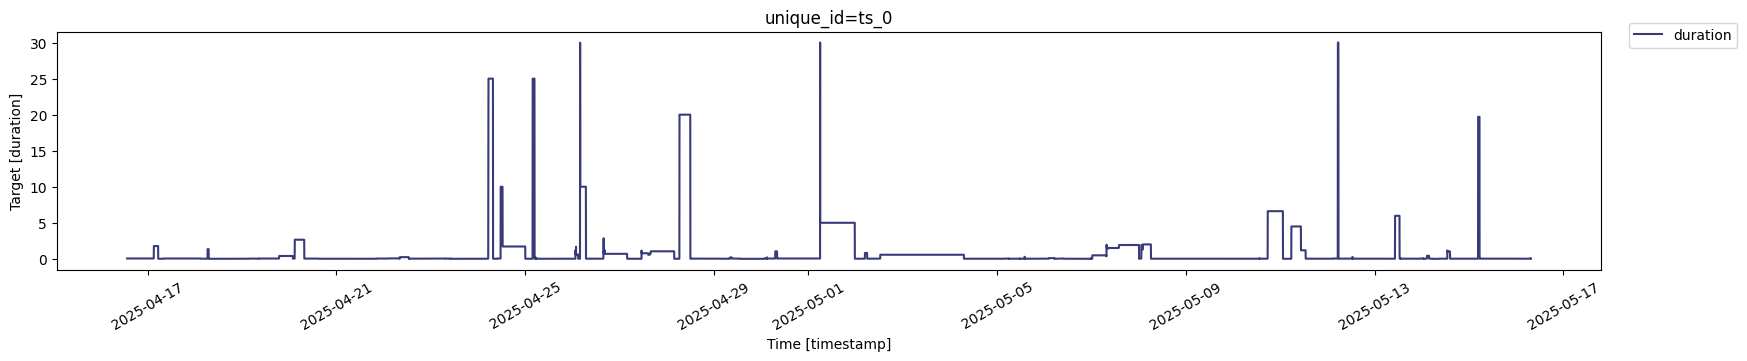

In [9]:
nixtla_client.plot(df, time_col='timestamp', target_col='duration')

In [20]:
timegpt_fcst_multiseries_df = nixtla_client.forecast(
    df=df,
    h=60,
    level=[80, 90],
    freq='T',
    id_col='appName',
    time_col='timestamp',
    target_col='duration'
)
timegpt_fcst_multiseries_df.head()

/home/tarhone/anaconda3/envs/llm/lib/python3.12/site-packages/nixtla/nixtla_client.py:867: UserWarning: Azure endpoint detected, setting `model` to 'azureai'.
  warnings.warn("Azure endpoint detected, setting `model` to 'azureai'.")
INFO:nixtla.nixtla_client:Validating inputs...
/home/tarhone/anaconda3/envs/llm/lib/python3.12/site-packages/utilsforecast/preprocessing.py:131: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  offset = pd.tseries.frequencies.to_offset(freq)
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...
/home/tarhone/anaconda3/envs/llm/lib/python3.12/site-packages/utilsforecast/processing.py:384: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/home/tarhone/anaconda3/envs/llm/lib/python3.12/site-packages/utilsforeca

,appName,timestamp,TimeGPT,TimeGPT-hi-80,TimeGPT-hi-90,TimeGPT-lo-80,TimeGPT-lo-90
0,pos-apply-sgp-aks-sea-emm-prd,2025-05-16 07:31:00,0.031581,0.162605,0.164392,-0.099442,-0.101229
1,pos-apply-sgp-aks-sea-emm-prd,2025-05-16 07:32:00,0.030409,0.141576,0.193203,-0.080758,-0.132386
2,pos-apply-sgp-aks-sea-emm-prd,2025-05-16 07:33:00,0.029053,0.158642,0.212690,-0.100537,-0.154585
3,pos-apply-sgp-aks-sea-emm-prd,2025-05-16 07:34:00,0.028425,0.188024,0.284674,-0.131174,-0.227824
4,pos-apply-sgp-aks-sea-emm-prd,2025-05-16 07:35:00,0.028750,0.249230,0.297506,-0.191731,-0.240006


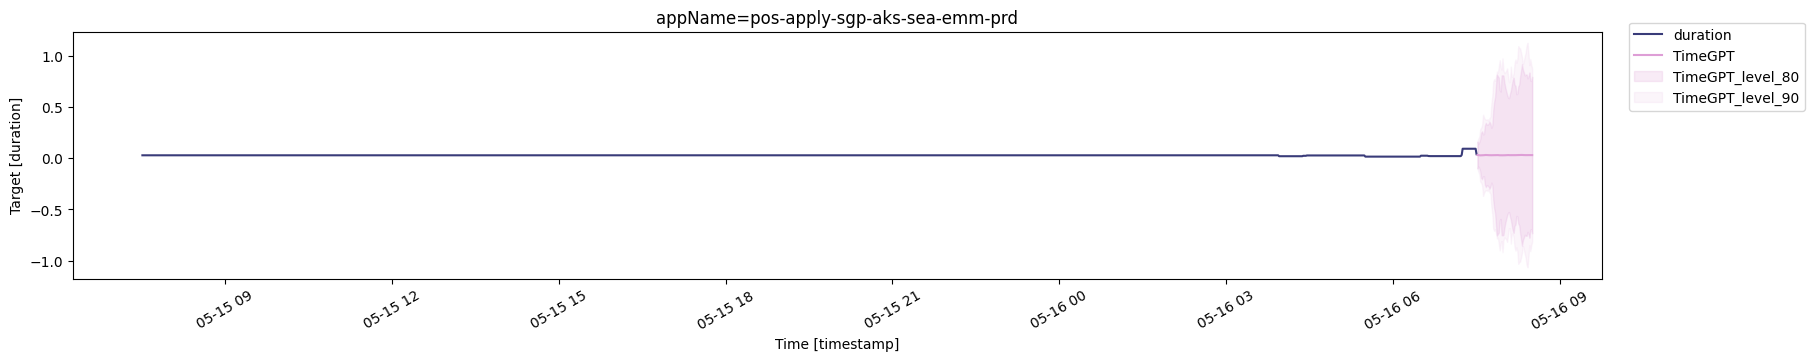

In [23]:
nixtla_client.plot(
    df,
    timegpt_fcst_multiseries_df,
    max_insample_length=1440,
    level=[80, 90],
    id_col='appName',
    time_col='timestamp',
    target_col='duration'
)